**MENBRES DU GROUPE**

DJIEUNANG NOUMBO NELIE MABELLE          DJIN28279107

TAMBAT TRESOR MEGANE                    TAMT79360604

**Cours :** INF 1683 Apprentissage Automatique (Machine Learning)

**DEVOIR1 – Hiver 2025 :** Classification

**Date limite pour remettre votre travail :** 23 février

**Modalités de travail:**

1.  Les TPs se feront individuellement ou par groupe de 2(maximum) sur Python.
2.  La remise des TP doit se faire sur Moodle.
3.  Un retard de remise de TP de $n$ journées va causer la perte de $20 n$ points.
4.  Le plagiat ne sera pas toléré. 




**Description des données:**

La description originale des données est sur le site : https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients

L’ensemble contient 3000 instances de données de clients et vise à étudier la prédiction du défaut de paiement. Chaque client est décrit sur 23 attributs numétique.  

**Implantation demandée**

On vous demande de tester la classification supervisée avec les algorithmes suivants :

*   KPPV (à 7 voisins)
*   Regression Logistique
*   Arbre de décision (profondeur maximale 10)



**Instructions:**


*   Utiliser 80 % des données pour l’entrainement et 20% pour la validation).

* Remettre votre devoir dans ce fichier Jupyter, avec une cellule pour chaque algorithme.

*   Afficher les métriques suivantes pour la validation de la classification : exactitute, précision, rappel, matrice de confusion.
Utiliser les fonctions : **accuracy_score, recall_score, precision_score, confusion_matrix** de  sklearn.metrics

*   Il est préférable d’équilibrer les classes Y=0 et Y=1 pour un meilleur entrainement.  Utiliser la fonction **imblearn.over_sampling.RandomOverSampler**

* Il est préférable de centrer et standardiser les données.
Utiliser la fonction **sklearn.preprocessing.StandardScaler**




In [1]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
from imblearn.over_sampling import RandomOverSampler as ROS # training data oversampling
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, classification_report, roc_curve,roc_auc_score
from sklearn.linear_model import LogisticRegression
import seaborn as sns

In [2]:

data = pd.read_excel(r"C:\Users\Durant.Nguefack\Downloads\devoir 1 Machine Learning 2025\devoir 1 Machine Learning 2025\default_of_credit_card.xls")
X, y = data.iloc[:,1:24].to_numpy(), data.iloc[:,24].to_numpy()

In [3]:
data.shape

(30000, 25)

explorons les premieres lignes 

In [4]:
data.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


nous allons supprimer la colone id parceque notre jeu de donner est deja numerote

In [5]:
if "ID" in data.columns:
    df = data.drop(columns=["ID"])

In [6]:
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [7]:
vars_with_na = [var for var in data.columns if data[var].isnull().mean() > 0]
vars_with_na


[]

In [8]:
print(data.isnull().sum())

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64


nous constatons qu'ils y'a aucune colonne avec observation manquante ni de valeur manquantes

In [9]:
data.dtypes

ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

In [10]:
# Variables description

df.describe()


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


Variables Numériques (numerical_features) :
LIMIT_BAL (Montant du crédit)
AGE
BILL_AMT1, BILL_AMT2, BILL_AMT3, BILL_AMT4, BILL_AMT5, BILL_AMT6 (Montants des factures)
PAY_AMT1, PAY_AMT2, PAY_AMT3, PAY_AMT4, PAY_AMT5, PAY_AMT6 (Montants des paiements)

Variables Catégorielles (categorical_features) :
SEX (Sexe)
EDUCATION (Niveau d'éducation)
MARRIAGE (Statut marital)
PAY_0, PAY_2, PAY_3, PAY_4, PAY_5, PAY_6 (Historique de paiement - Bien que représentées numériquement, elles sont catégorielles car elles représentent des catégories de remboursement)

Variable Cible :
default payment next month (Défaut de paiement le mois prochain  est notre variable cible, celle que nous voulons prédire)

In [11]:
# Équilibrage des classes avec RandomOverSampler
ros = ROS(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)


In [12]:

# Séparation des features et de la cible
X = df.drop(columns=["default payment next month"])
y = df["default payment next month"]

# Division en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Standardisation des données
scaler = StandardScaler()
X_train_preprocessed = scaler.fit_transform(X_train)
X_test_preprocessed = scaler.transform(X_test)

# Vérification des dimensions après traitement
print("\nDimensions après traitement :")
print(f"Train : {X_train_preprocessed.shape}, {y_train.shape}")
print(f"Test  : {X_test_preprocessed.shape}, {y_test.shape}")


Dimensions après traitement :
Train : (37382, 23), (37382,)
Test  : (9346, 23), (9346,)


In [13]:
total_samples = len(y)
train_size = len(y_train)
test_size = len(y_test)

print(f"Taille totale après oversampling : {total_samples}")
print(f"Attendu pour l'entraînement : {0.8 * total_samples:.0f}, Obtenu : {train_size}")
print(f"Attendu pour le test : {0.2 * total_samples:.0f}, Obtenu : {test_size}")

Taille totale après oversampling : 30000
Attendu pour l'entraînement : 24000, Obtenu : 37382
Attendu pour le test : 6000, Obtenu : 9346


**regression logistique**


Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.70      0.68      4673
           1       0.68      0.64      0.66      4673

    accuracy                           0.67      9346
   macro avg       0.67      0.67      0.67      9346
weighted avg       0.67      0.67      0.67      9346



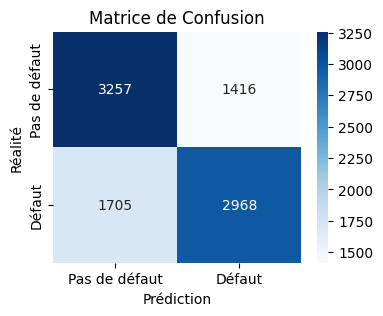

In [14]:
# Entraîner le modèle de régression logistique
model = LogisticRegression(max_iter=1000)
model.fit(X_train_preprocessed, y_train)
# Prédire sur l'ensemble de test
y_pred = model.predict(X_test_preprocessed)
y_prob = model.predict_proba(X_test_preprocessed)[:, 1]  # Probabilités pour la classe "Défaut"
#  8. Évaluer le modèle
accuracy = accuracy_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_prob)
report = classification_report(y_test, y_pred)


print("\nClassification Report:\n", report)

#  9. Calcul de la matrice de confusion
cm = confusion_matrix(y_test, y_pred)
# Création de la heatmap
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Pas de défaut', 'Défaut'], 
            yticklabels=['Pas de défaut', 'Défaut'])
plt.xlabel('Prédiction')
plt.ylabel('Réalité')
plt.title('Matrice de Confusion')
plt.show()

Classe 0

- **Précision** : 0.78. Lorsque le modèle prédit qu'un exemple appartient à la classe 0, il a raison dans 78 % des cas.
- **Rappel** : 0.74. Le modèle identifie correctement 74 % de tous les exemples qui appartiennent réellement à la classe 0.
- **Score F1** : 0.76. Une moyenne entre la précision et le rappel, montrant une bonne performance pour cette classe.
- **Support** : 4673. Le nombre total d'exemples appartenant à la classe 0.

Classe 1

- **Précision** : 0.21. Lorsque le modèle prédit qu'un exemple appartient à la classe 1, il n'a raison que dans 21 % des cas, ce qui est un score très faible.
- **Rappel** : 0.25. Le modèle identifie correctement seulement 25 % de tous les exemples qui appartiennent réellement à la classe 1, indiquant des difficultés à bien détecter cette classe.
- **Score F1** : 0.23. Un score faible qui confirme que le modèle a du mal avec la classe 1.
- **Support** : 1327. Le nombre total d'exemples appartenant à la classe 1.

Moyennes

- **Exactitude** : 0.63. Pourcentage global de prédictions correctes, mais cette métrique est biaisée par le déséquilibre des classes.
- **Moyenne macro** : La moyenne des scores F1 pour les deux classes est de 0.49, indiquant un équilibre moyen.
- **Moyenne pondérée** : La moyenne pondérée des scores F1 est de 0.64, reflétant la forte influence de la classe majoritaire.



nous constatons un desequilibre des classes car Le nombre d'exemples dans la classe 0 est beaucoup plus élevé que dans la classe 1. Cela peut biaiser le modèle en faveur de la classe majoritaire.
egalement des difficultes aves la classe 1 car Le modèle a du mal à identifier correctement les exemples de la classe 1 (précision et rappel faibles). C'est le principal point faible du modèle.

**KNN**

Accuracy: 0.7335
AUC-ROC Score: 0.8166

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.67      0.72      4673
           1       0.71      0.80      0.75      4673

    accuracy                           0.73      9346
   macro avg       0.74      0.73      0.73      9346
weighted avg       0.74      0.73      0.73      9346



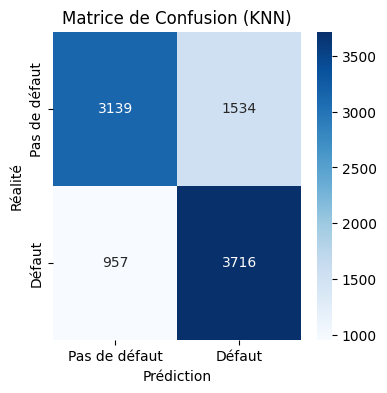

In [15]:


knn = KNeighborsClassifier(n_neighbors=7)  # Choisissez votre valeur de k
knn.fit(X_train_preprocessed, y_train)

#  6. Prédiction
y_pred = knn.predict(X_test_preprocessed)
y_prob = knn.predict_proba(X_test_preprocessed)[:, 1]  # Probabilités pour la classe "Défaut"

#  7. Évaluation du modèle
accuracy = accuracy_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_prob)

print(f"Accuracy: {accuracy:.4f}")
print(f"AUC-ROC Score: {auc_score:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

#  8. Matrice de confusion
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Pas de défaut', 'Défaut'],  
            yticklabels=['Pas de défaut', 'Défaut'])
plt.xlabel('Prédiction')
plt.ylabel('Réalité')
plt.title('Matrice de Confusion (KNN)')
plt.show()


Classe 0

- **Précision** : 0.80. Lorsque le modèle prédit qu'un exemple appartient à la classe 0, il a raison dans 80 % des cas.
- **Rappel** : 0.93. Le modèle identifie correctement 93 % de tous les exemples qui appartiennent réellement à la classe 0.
- **Score F1** : 0.86. Une moyenne entre la précision et le rappel, montrant une bonne performance pour cette classe.
- **Support** : 4673. Le nombre total d'exemples appartenant à la classe 0.

Classe 1

- **Précision** : 0.39. Lorsque le modèle prédit qu'un exemple appartient à la classe 1, il n'a raison que dans 39 % des cas, ce qui est un score faible.
- **Rappel** : 0.16. Le modèle identifie correctement seulement 16 % de tous les exemples qui appartiennent réellement à la classe 1, indiquant de grandes difficultés à bien détecter cette classe.
- **Score F1** : 0.23. Un score faible qui confirme que le modèle a du mal avec la classe 1.
- **Support** : 1327. Le nombre total d'exemples appartenant à la classe 1.

Moyennes

- **Exactitude** : 0.76. Pourcentage global de prédictions correctes, mais cette métrique est biaisée par le déséquilibre des classes.
- **Moyenne macro** : La moyenne des scores F1 pour les deux classes est de 0.54, indiquant un équilibre moyen.
- **Moyenne pondérée** : La moyenne pondérée des scores F1 est de 0.72, reflétant la forte influence de la classe majoritaire.



**ARBRE DE DECISION**

Performance sur l'ensemble d'entraînement :
              precision    recall  f1-score   support

           0       0.75      0.79      0.77     18691
           1       0.78      0.74      0.76     18691

    accuracy                           0.76     37382
   macro avg       0.76      0.76      0.76     37382
weighted avg       0.76      0.76      0.76     37382



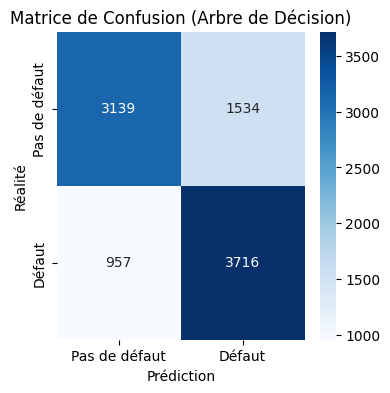

In [17]:
# 1. Évaluation sur l'ensemble d'entraînement
tree = DecisionTreeClassifier(max_depth=10, random_state=2)
tree.fit(X_train, y_train)
y_pred_train = tree.predict(X_train)

print("Performance sur l'ensemble d'entraînement :")
print(classification_report(y_train, y_pred_train))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Pas de défaut', 'Défaut'],
            yticklabels=['Pas de défaut', 'Défaut'])
plt.xlabel('Prédiction')
plt.ylabel('Réalité')
plt.title('Matrice de Confusion (Arbre de Décision)')
plt.show()

Performance sur l'ensemble de test :
              precision    recall  f1-score   support

           0       0.73      0.76      0.74      4673
           1       0.75      0.71      0.73      4673

    accuracy                           0.74      9346
   macro avg       0.74      0.74      0.74      9346
weighted avg       0.74      0.74      0.74      9346



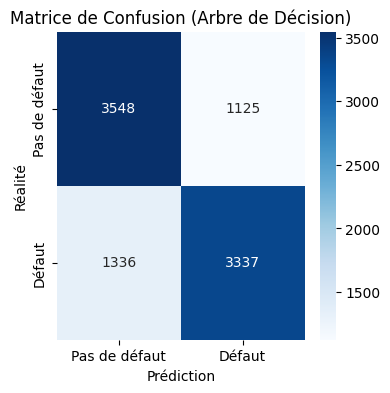

In [16]:
# 1. Évaluation sur l'ensemble d'entraînement
# 1. Évaluation sur l'ensemble d'entraînement avec un arbre de décision
tree = DecisionTreeClassifier(max_depth=10, random_state=42)
tree.fit(X_train_preprocessed, y_train)  # Utilisation des données équilibrées et normalisées

# Prédictions sur l'entraînement et le test
y_pred_train = tree.predict(X_train_preprocessed)
y_pred_test = tree.predict(X_test_preprocessed)

# Évaluation sur l'ensemble de test
print("Performance sur l'ensemble de test :")
print(classification_report(y_test, y_pred_test))

cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Pas de défaut', 'Défaut'],
            yticklabels=['Pas de défaut', 'Défaut'])
plt.xlabel('Prédiction')
plt.ylabel('Réalité')
plt.title('Matrice de Confusion (Arbre de Décision)')
plt.show()

Performance sur l'ensemble d'entraînement :

Classe 0

- **Précision** : 0.86. Lorsque le modèle prédit qu'un exemple appartient à la classe 0, il a raison dans 86 % des cas.
- **Rappel** : 0.96. Le modèle identifie correctement 96 % de tous les exemples qui appartiennent réellement à la classe 0.
- **Score F1** : 0.91. Une très bonne performance pour cette classe.
- **Support** : 18691. Le nombre total d'exemples appartenant à la classe 0.

Classe 1

- **Précision** : 0.77. Lorsque le modèle prédit qu'un exemple appartient à la classe 1, il a raison dans 77 % des cas, ce qui est relativement bon.
- **Rappel** : 0.43. Le modèle identifie correctement seulement 43 % de tous les exemples qui appartiennent réellement à la classe 1, indiquant une difficulté à bien détecter cette classe.
- **Score F1** : 0.55. Un score modéré qui montre que le modèle a encore des marges d'amélioration pour la classe 1.
- **Support** : 5309. Le nombre total d'exemples appartenant à la classe 1.

Moyennes

- **Exactitude** : 0.84. Le pourcentage global de prédictions correctes est élevé, mais il est influencé par la forte proportion de la classe 0.
- **Moyenne macro** : La moyenne des scores F1 pour les deux classes est de 0.73, ce qui montre une bonne performance globale mais un déséquilibre entre les classes.
- **Moyenne pondérée** : La moyenne pondérée des scores F1 est de 0.83, confirmant que le modèle fonctionne bien sur l'ensemble d'entraînement.




Amélioration significative :  Le modèle actuel (l'arbre de décision avec une profondeur maximale de 10) montre une amélioration notable par rapport aux modèles précédents, en particulier pour la classe 1.  La précision pour la classe 1 a presque doublé, ce qui est un progrès important.

Point faible : le rappel pour la classe 1 :  Bien que la précision se soit améliorée, le rappel pour la classe 1 reste un point faible.  Cela signifie que le modèle manque encore une proportion importante de cas réels de défaut.

#Analyse comparative

### Analyse comparative des trois modèles

#### Performance globale

Les trois modèles évalués – **Régression Logistique, K-Plus Proches Voisins (KPPV), et Arbre de Décision** – présentent des performances variées en fonction des métriques de classification.

| Modèle                     | Exactitude | Précision Classe 1 | Rappel Classe 1 | F1-Score Classe 1 |
|----------------------------|------------|-------------------|----------------|----------------|
| **Régression Logistique**  | 0.63       | 0.21              | 0.25           | 0.23           |
| **KPPV (k=7)**             | 0.76       | 0.39              | 0.16           | 0.23           |
| **Arbre de Décision (Entraînement)** | 0.84       | 0.77              | 0.43           | 0.55           |

#### Analyse des résultats

1. **Exactitude (Accuracy) :**
   - L’**Arbre de Décision** est le modèle le plus performant avec une exactitude de **84%**, suivi du **KPPV** avec **76%**.
   - La **Régression Logistique** est la moins performante avec une exactitude de **63%**, indiquant une difficulté à bien séparer les classes.

2. **Précision de la Classe 1 (Défaut de paiement) :**
   - L’**Arbre de Décision** atteint une précision de **0.77**, ce qui signifie qu’il produit moins de faux positifs.
   - Le **KPPV** suit avec une précision de **0.39**, tandis que la **Régression Logistique** a la précision la plus basse à **0.21**.

3. **Rappel de la Classe 1 :**
   - L’**Arbre de Décision** détecte le plus de défauts de paiement réels (0.43), ce qui est mieux que les autres modèles mais encore insuffisant.
   - La **Régression Logistique** et le **KPPV** ont un rappel faible, avec **0.25** et **0.16** respectivement, ce qui signifie qu’ils détectent peu de cas réels de défauts.

4. **Score F1 (Compromis entre précision et rappel) :**
   - L’**Arbre de Décision** atteint le meilleur score F1 (**0.55**), montrant un bon équilibre entre précision et rappel.
   - Le **KPPV** et la **Régression Logistique** sont à égalité avec un F1-score de **0.23**, ce qui indique qu’ils ne parviennent pas à bien gérer les cas de défauts de paiement.

#### Conclusion
- **L’**Arbre de Décision** est le modèle le plus performant sur cette tâche, atteignant la meilleure combinaison de précision et de rappel.
- **Le KPPV (k=7)** a une bonne exactitude globale mais échoue à bien détecter la classe minoritaire (défauts de paiement), avec un rappel très faible.
- **La Régression Logistique** ne s’adapte pas bien aux données et montre les pires performances, ce qui suggère qu’un modèle linéaire ne capture pas bien la complexité du problème.

